In [1]:
import sys
if '..' not in sys.path:
    sys.path.insert(0, "..")

from importnb import imports
with imports("ipynb"):
    from common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        print_feature_outliers,
        remove_outliers,
        generate_numerical_eda_visualization,
        generate_categorical_count_visualization,
        generate_numerical_heatmap,
        generate_numerical_categorical_heatmap,
        generate_numerical_vs_categorical_eda_visualization,
        generate_kprototype_clusters,
        generate_categorical_based_on_numerical_feature_heatmap,
        generate_numerical_categorical_scatter_plot,
        generate_pairplot,
        generate_kproto_heatmap,
        generate_confusion_matrix,
        generate_decision_tree
    )

# Exploratory Data Analysis
- Objective: Perform EDA on dataset while ensure that all function is working fine
- Motivation of Analysis: The type course catergory will impact the number of subscribers, price and average rating 

In [2]:
DatasetRaw = load_dataset("../../dataset")
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  int64         
 1   title               209734 non-null  string        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float64       
 4   headline            209707 non-null  string        
 5   num_subscribers     209734 non-null  int64         
 6   avg_rating          209734 non-null  float64       
 7   num_reviews         209734 non-null  int64         
 8   num_comments        209734 non-null  int64         
 9   num_lectures        209734 non-null  int64         
 10  content_length_min  209734 non-null  int64         
 11  published_time      209734 non-null  object        
 12  last_update_date    209597 non-null  datetime64[ns]
 13  category            209734 no

In [3]:
parameters = load_parameters(".")

In [4]:
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters)
CleanUpDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166104 entries, 0 to 166103
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               166104 non-null  float64 
 1   num_subscribers     166104 non-null  int64   
 2   avg_rating          166104 non-null  float64 
 3   num_lectures        166104 non-null  int64   
 4   content_length_min  166104 non-null  int64   
 5   category            166104 non-null  category
 6   subcategory         166104 non-null  category
 7   language            166104 non-null  category
 8   instructor_name     166104 non-null  category
dtypes: category(4), float64(2), int64(3)
memory usage: 10.2 MB


In [5]:
CleanUpDataset.describe()

,price,num_subscribers,avg_rating,num_lectures,content_length_min
count,166104.000000,1.661040e+05,166104.000000,166104.000000,166104.000000
mean,97.887084,2.855176e+03,3.915862,40.322256,291.628967
std,120.408860,1.506008e+04,1.352376,55.300467,471.545984
min,11.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,24.000000,3.000000e+01,3.900000,13.000000,79.000000
50%,49.990000,1.850000e+02,4.350000,25.000000,156.000000
75%,129.900000,1.216000e+03,4.650000,47.000000,323.000000
max,999.990000,1.612862e+06,5.000000,1095.000000,21353.000000


In [6]:
# generate_numerical_eda_visualization(CleanUpDataset, "Numerical EDA")

In [7]:
print_feature_outliers(CleanUpDataset)

[price] total outliers: 7309
[num_subscribers] total outliers: 24966
[avg_rating] total outliers: 17859
[num_lectures] total outliers: 13062
[content_length_min] total outliers: 14640


In [8]:
RemovedOutlierDataset = remove_outliers(CleanUpDataset)
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106240 entries, 0 to 106239
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               106240 non-null  float64 
 1   num_subscribers     106240 non-null  int64   
 2   avg_rating          106240 non-null  float64 
 3   num_lectures        106240 non-null  int64   
 4   content_length_min  106240 non-null  int64   
 5   category            106240 non-null  category
 6   subcategory         106240 non-null  category
 7   language            106240 non-null  category
 8   instructor_name     106240 non-null  category
dtypes: category(4), float64(2), int64(3)
memory usage: 7.4 MB


In [9]:
# generate_numerical_eda_visualization(RemovedOutlierDataset, "[OUTLIERS REMOVED] Numerical EDA")

In [10]:
# generate_categorical_count_visualization(RemovedOutlierDataset, parameters)

In [11]:
# generate_numerical_vs_categorical_eda_visualization(RemovedOutlierDataset, parameters, '[UNION outliers removed] num_subscriber VS category')

In [12]:
# generate_numerical_heatmap(RemovedOutlierDataset, "[UNION outliers removed] Numerical heatmap")

In [13]:
# generate_numerical_categorical_heatmap(RemovedOutlierDataset)

In [14]:
# generate_categorical_based_on_numerical_feature_heatmap(RemovedOutlierDataset, 'category', 'subcategory', 'avg_rating', 'average rating of course catergory')
# generate_categorical_based_on_numerical_feature_heatmap(RemovedOutlierDataset, 'category', 'subcategory', 'num_subscribers', 'number of subscribers of course catergory')
# generate_categorical_based_on_numerical_feature_heatmap(RemovedOutlierDataset, 'category', 'subcategory', 'price', 'price of course catergory')

In [15]:
# generate_numerical_categorical_scatter_plot(RemovedOutlierDataset, parameters)

In [16]:
# AddClusterDataset = generate_kmodes_clusters(RemovedOutlierDataset, parameters)

In [17]:
# generate_pairplot()

In [18]:
# generate_kproto_heatmap()

In [19]:
# generate_confusion_matrix()

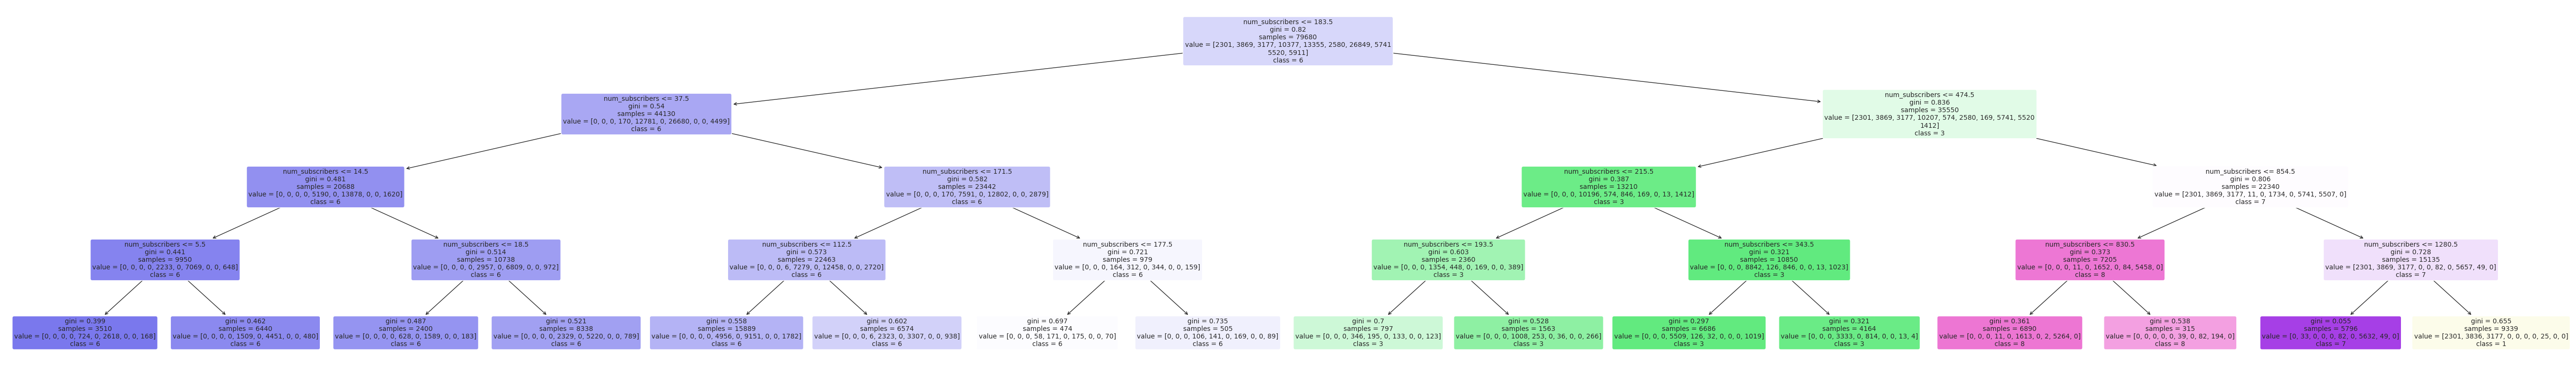

In [20]:
generate_decision_tree()